**Nama: Afif Ibadurrahman Jalaluddin**

**Nim: 1103210221**

**Lecture 3 : Knn**

**Chat Gpt: https://chat.openai.com/share/5e03accf-f65b-4202-b153-cf1cd4047121**

**Dataset : iris.csv**

**Prompt chatGPT : Beri Kode Untuk Menyambungkan Gdrive dengan google colab**

**1. Menyambungkan Google Colab dan Gdrive**

In [29]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Prompt chatGPT : Berikanlah kode untuk membuat model kNN dengan dataset iris.csv**

**2. Import Library**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

**3. Mengambil dataset dari Gdrive**

In [31]:
iris_data = pd.read_csv('/content/drive/MyDrive/Dataset/Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**4. Memisahkan fitur dan table**

In [32]:
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

**5. Memisahkan data menjadi data latih dan data uji**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**6. Normalisasi fitur**

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**7. Membuat model kNN**

In [35]:
k = 3  # Jumlah tetangga yang akan diperhitungkan
knn_classifier = KNeighborsClassifier(n_neighbors=k)

**8. Melatih model**

In [36]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**9. Memprediksi label kelas untuk data uji**

In [37]:
y_pred = knn_classifier.predict(X_test)

**10. Evaluasi model**

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Prompt chatGPT : beri kode untuk menvisualisasikannya**

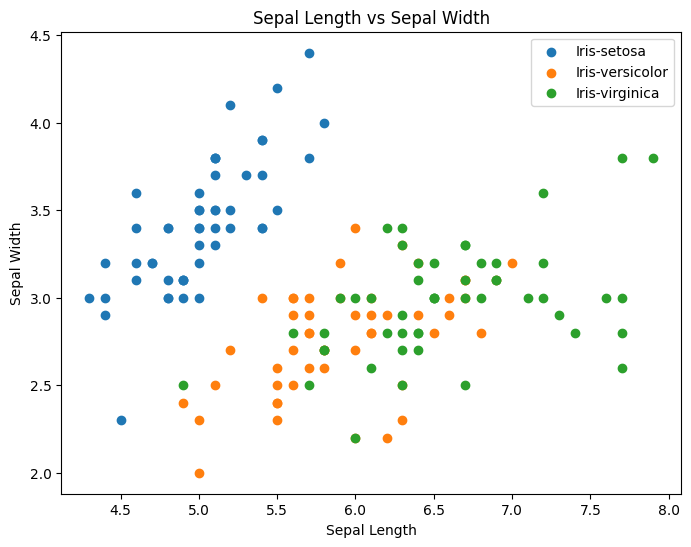

In [39]:
# Visualisasi menggunakan scatter plot
plt.figure(figsize=(8, 6))

# Memisahkan data berdasarkan spesies
for Species in iris_data['Species'].unique():
    Species_data = iris_data[iris_data['Species'] == Species]
    plt.scatter(Species_data['SepalLengthCm'], Species_data['SepalWidthCm'], label=Species)

# Menambahkan label dan judul plot
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()


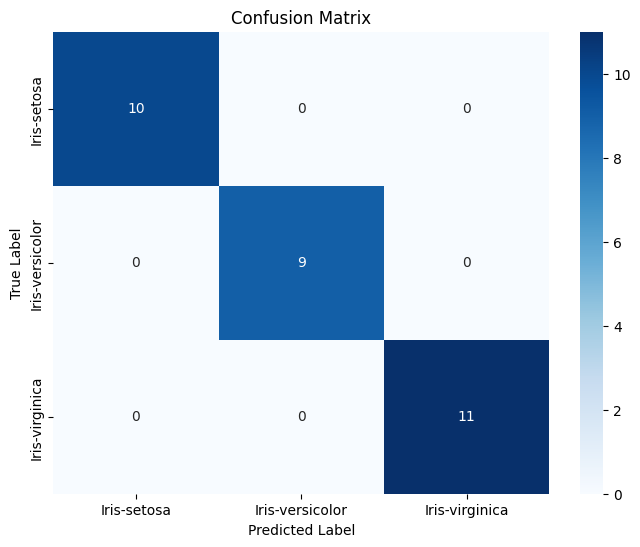

In [40]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
